# BOOK RECOMMENDER SYSTEM AND ONLINE BOOK STORE PROJECT

### SCRAPING THE BOOKS DATA

In [43]:
#Imported required libraries
import time
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

#opeoning chrome browser

driver = webdriver.Chrome("chromedriver.exe")

In [36]:
#collecting all the href links from webpages


links=[]

for i in range (1,70):
    driver.get(f'https://www.goodreads.com/list/show/6.Best_Books_of_the_20th_Century?page={i}');
    time.sleep(2)
    
    linklist = driver.find_elements('tag name','a')
    for j in linklist:
        links.append(j.get_attribute('href'))
        
        
for i in range (1,90):
    driver.get(f'https://www.goodreads.com/list/show/19.Best_for_Book_Clubs?page={i}');
    time.sleep(2)
    
    linklist = driver.find_elements('tag name','a')
    for j in linklist:
        links.append(j.get_attribute('href'))

In [38]:
#filtering the book webpage links

href=[]
for i in links:
    try:
        if '/book/show/' in i:
            href.append(i)
    except:
        pass
    
href_final=list(set(href))
len(href_final)

df=pd.DataFrame(href_final)

#saving the book webpage links in csv file

df.to_csv('newbook.csv',index=False)

['https://www.goodreads.com/book/show/9756659-emory-s-gift',
 'https://www.goodreads.com/book/show/3343049-africa-s-world-war',
 'https://www.goodreads.com/book/show/281235.Bunnicula',
 'https://www.goodreads.com/book/show/80449.On_the_Genealogy_of_Morals',
 'https://www.goodreads.com/book/show/19321.The_Tale_of_Peter_Rabbit',
 'https://www.goodreads.com/book/show/18240649-reclaiming-the-sand',
 'https://www.goodreads.com/book/show/41416475-taken',
 'https://www.goodreads.com/book/show/13047090-onyx',
 'https://www.goodreads.com/book/show/3483.Special_Topics_in_Calamity_Physics',
 'https://www.goodreads.com/book/show/823561.I_the_Jury',
 'https://www.goodreads.com/book/show/16088599-from-man-to-man',
 'https://www.goodreads.com/book/show/6595962-bloodroot',
 'https://www.goodreads.com/book/show/1327699.Hari_Hari_Bahagia_di_Bullerbyn',
 'https://www.goodreads.com/book/show/28385.In_the_Shadow_of_Young_Girls_in_Flower',
 'https://www.goodreads.com/book/show/102957.Preacher_Volume_6',
 'h

In [49]:
#created the dictionary for appending the required info

BOOK_DATA={ "book_name":[],
            "author":[],
            "genre":[],
           'pages':[],
           "publication_year":[],
            "rating":[],
            "total ratings":[],
            "reviews":[],
            "cover":[],
            "page_link":[]}

#fetched the book imformation and appended the required data
print("started to extract the books data from webpages","\n")


count=0

for i in range(5000):
    
    try:
        #appending page link in dictionary 
        
        BOOK_DATA["page_link"].append(href_final[i])
        driver.get(href_final[i])
               
        driver.implicitly_wait(2)
        
        #book name
        try:
            
            book_n= driver.find_element(By.XPATH,"/html/body/div[1]/div/main/div[1]/div[2]/div[1]/div[1]/div[1]/h1").text
            BOOK_DATA["book_name"].append(book_n)
        except:
            BOOK_DATA["book_name"].append('Na')
        
        #author name
        try:
            
            auth = driver.find_element(By.CLASS_NAME,'ContributorLink__name').text
            BOOK_DATA["author"].append(auth)
        except:
            BOOK_DATA["author"].append("Na")
        
        #availability
        try:
            
            gnr = driver.find_element(By.XPATH,'/html/body/div[1]/div/main/div[1]/div[2]/div[1]/div[2]/div[5]/ul/span[1]/span[2]/a/span').text
            BOOK_DATA["genre"].append(gnr)
        except:
            BOOK_DATA["genre"].append("Na")
            
        try:
            
            pgs = driver.find_element(By.XPATH,'/html/body/div[1]/div/main/div[1]/div[2]/div[1]/div[2]/div[6]/div/span[1]/span/div/p[1]').text
            BOOK_DATA["pages"].append(pgs)
        except:
            BOOK_DATA["pages"].append("Na")
        
         #book rating   
        try:
            rate = driver.find_element(By.XPATH,'//*[@id="__next"]/div/main/div[1]/div[2]/div[1]/div[2]/div[2]/a/div[1]/div').text
            BOOK_DATA["rating"].append(rate)
        except:
            BOOK_DATA["rating"].append("Na")
            
       
        #book photo
        try:
            image = driver.find_elements(By.XPATH,'/html/body/div[1]/div/main/div[1]/div[1]/div/div[1]/div/div/div/div/div/div/img')
            for i in range(1):
                BOOK_DATA["cover"].append(image[i].get_attribute('src'))
                    
        except:
            BOOK_DATA["cover"].append('Na')
            
         #shipping time
        try:
            
            tr = driver.find_element(By.XPATH,'/html/body/div[1]/div/main/div[1]/div[2]/div[1]/div[2]/div[2]/a/div[2]/div/span[1]').text
            BOOK_DATA["total ratings"].append(tr)
        except:
            BOOK_DATA["total ratings"].append("Na")
            
        try:
            
            reviews = driver.find_element(By.XPATH,'/html/body/div[1]/div/main/div[1]/div[2]/div[1]/div[2]/div[2]/a/div[2]/div/span[2]').text
            BOOK_DATA["reviews"].append(reviews)
        except:
            BOOK_DATA["reviews"].append("Na")
        
        #published year
        try:
            
            puby = driver.find_element(By.XPATH,'/html/body/div[1]/div/main/div[1]/div[2]/div[1]/div[2]/div[6]/div/span[1]/span/div/p[2]').text
            BOOK_DATA["publication_year"].append(puby)
        except:
            BOOK_DATA["publication_year"].append("Na")
            
       

        driver.implicitly_wait(1)


        count+=1
        print("book :",count,'|',end=' ')
    except:
        pass
        
print("book data collection done")

started to extract the books data from webpages 

book : 1 | book : 2 | book : 3 | book : 4 | book : 5 | book : 6 | book : 7 | book : 8 | book : 9 | book : 10 | book : 11 | book : 12 | book : 13 | book : 14 | book : 15 | book : 16 | book : 17 | book : 18 | book : 19 | book : 20 | book : 21 | book : 22 | book : 23 | book : 24 | book : 25 | book : 26 | book : 27 | book : 28 | book : 29 | book : 30 | book : 31 | book : 32 | book : 33 | book : 34 | book : 35 | book : 36 | book : 37 | book : 38 | book : 39 | book : 40 | book : 41 | book : 42 | book : 43 | book : 44 | book : 45 | book : 46 | book : 47 | book : 48 | book : 49 | book : 50 | book : 51 | book : 52 | book : 53 | book : 54 | book : 55 | book : 56 | book : 57 | book : 58 | book : 59 | book : 60 | book : 61 | book : 62 | book : 63 | book : 64 | book : 65 | book : 66 | book : 67 | book : 68 | book : 69 | book : 70 | book : 71 | book : 72 | book : 73 | book : 74 | book : 75 | book : 76 | book : 77 | book : 78 | book : 79 | book : 80 |

In [118]:
#converted the dictionary into dataframe

df1=pd.DataFrame(BOOK_DATA)

### DATA CLEANING

In [130]:
#Replacing Na values with null

df1=df1.replace('Na',np.nan)

In [131]:
#checking the null values in each columns

df1.isna().sum()

book_name            20
author                7
genre               585
pages               587
publication_year    604
rating               13
total ratings        13
reviews              13
cover                13
page_link             0
dtype: int64

In [132]:
#dropping null values

df1.dropna(inplace=True)

In [147]:
#checking datatypes
df1.dtypes

book_name           object
author              object
genre               object
pages               object
publication_year    object
rating              object
total ratings       object
reviews             object
cover               object
page_link           object
dtype: object

In [148]:
#splitting column value into two columns

df1[['page','binding']]=df1['pages'].str.split(",",expand=True)

In [150]:
#splitting column value into two columns

df1[['month','year']]=df1['publication_year'].str.split(",",expand=True)

In [152]:
#dropping unneccesary columns

df1.drop(columns=['month','pages'],inplace=True)

In [157]:
#removing string values from numerical columns

df1['total ratings']=df1['total ratings'].str.replace('ratings','')

df1['reviews']=df1['reviews'].str.replace('reviews','')

df1['page']=df1['page'].str.replace('pages','')

In [161]:
df1.head(5)

,book_name,author,genre,publication_year,rating,total ratings,reviews,cover,page_link,page,binding,year
0,Emory's Gift,W. Bruce Cameron,Animals,"First published August 30, 2011",4.02,2932,466,https://images-na.ssl-images-amazon.com/images...,'https://www.goodreads.com/book/show/9756659-e...,359,Hardcover,2011
1,"Africa's World War: Congo, the Rwandan Genocid...",Gérard Prunier,Africa,"First published November 1, 2006",4.09,696,61,https://images-na.ssl-images-amazon.com/images...,'https://www.goodreads.com/book/show/3343049-a...,576,Hardcover,2006
2,Bunnicula,Deborah Howe,Childrens,"First published March 1, 1979",3.87,66609,2950,https://images-na.ssl-images-amazon.com/images...,'https://www.goodreads.com/book/show/281235.Bu...,98,Paperback,1979
3,On the Genealogy of Morals,Friedrich Nietzsche,Philosophy,"First published January 1, 1887",4.13,25471,1085,https://images-na.ssl-images-amazon.com/images...,'https://www.goodreads.com/book/show/80449.On_...,208,Paperback,1887
4,The Tale of Peter Rabbit,Beatrix Potter,Childrens,"First published December 16, 1901",4.21,236144,2526,https://images-na.ssl-images-amazon.com/images...,'https://www.goodreads.com/book/show/19321.The...,72,Hardcover,1901


### CHANGING DATATYPES OF NUMERICAL COLUMNS

In [163]:
col=['rating','total ratings','reviews','page','year']

for i in col:
    df1[i]=pd.to_numeric(df1[i],errors='coerce')

In [164]:
df1.dtypes

book_name            object
author               object
genre                object
publication_year     object
rating              float64
total ratings         int64
reviews             float64
cover                object
page_link            object
page                float64
binding              object
year                  int64
dtype: object

In [169]:
df1.dropna(inplace=True)

In [170]:
df1.isna().sum()

book_name           0
author              0
genre               0
publication_year    0
rating              0
total ratings       0
reviews             0
cover               0
page_link           0
page                0
binding             0
year                0
dtype: int64

## Building Machine learning models
1.clustering model for grouping books in 3 rating ranges

In [199]:
#importing kmeans clustering algorithm

from sklearn.cluster import KMeans

#n_cluster value is 3 

kmeans = KMeans(n_clusters=3)

In [201]:
#fittig the model

kmeans.fit(df1[['total ratings','page']])

#predicting values

cluster = kmeans.predict(df1[['total ratings','page']])

df1['cluster']=cluster

In [207]:
df1.head()

,book_name,author,genre,publication_year,rating,total ratings,reviews,cover,page_link,page,binding,year,cluster
0,Emory's Gift,W. Bruce Cameron,Animals,"First published August 30, 2011",4.02,2932,466,https://images-na.ssl-images-amazon.com/images...,https://www.goodreads.com/book/show/9756659-em...,359,Hardcover,2011,less visited
1,"Africa's World War: Congo, the Rwandan Genocid...",Gérard Prunier,Africa,"First published November 1, 2006",4.09,696,61,https://images-na.ssl-images-amazon.com/images...,https://www.goodreads.com/book/show/3343049-af...,576,Hardcover,2006,less visited
2,Bunnicula,Deborah Howe,Childrens,"First published March 1, 1979",3.87,66609,2950,https://images-na.ssl-images-amazon.com/images...,https://www.goodreads.com/book/show/281235.Bun...,98,Paperback,1979,less visited
3,On the Genealogy of Morals,Friedrich Nietzsche,Philosophy,"First published January 1, 1887",4.13,25471,1085,https://images-na.ssl-images-amazon.com/images...,https://www.goodreads.com/book/show/80449.On_t...,208,Paperback,1887,less visited
4,The Tale of Peter Rabbit,Beatrix Potter,Childrens,"First published December 16, 1901",4.21,236144,2526,https://images-na.ssl-images-amazon.com/images...,https://www.goodreads.com/book/show/19321.The_...,72,Hardcover,1901,less visited


In [203]:
classes={0:'less visited',1:'average visited',2:'highely visited'}

df1['cluster']= df1['cluster'].map(classes)

In [206]:
#saving the dataset as csvfile

df1.to_csv("goodreads.csv",index=False)

### BOOK RECOMMENDER SYSTEM

In [142]:
from sklearn.metrics.pairwise import cosine_similarity

# Load the data into a Pandas DataFrame
books = pd.read_csv("goodreads.csv")

# Onehot encoding on genre columns
book_features = pd.get_dummies(books["genre"])

# Calculating the cosine similarity between each pair of books based on their genre features
cosine_sim = cosine_similarity(book_features)

# Create a function that takes a book title as input and returns the top 5 books most similar to it based on genre
def recommend_books(title):
    # Find the index of the book with the given title
    index = books[books["book_name"] == title].index[0]
    
    # Get the cosine similarity scores of all books with respect to the book at the given index
    sim_scores = list(enumerate(cosine_sim[index]))
    
    # Sort the cosine similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 5 books with the highest cosine similarity scores
    top_books = [i[0] for i in sim_scores[1:6]]
    

    # Return the titles of the top 5 books
    return books.iloc[top_books]["book_name"]

# Test the recommendation function


In [145]:
print(recommend_books("The Tale of Peter Rabbit"))

4           The Tale of Peter Rabbit
11    Hari-Hari Bahagia di Bullerbyn
27    Disney's Prince and the Pauper
52              Ramona Quimby, Age 8
86            Frog and Toad Together
Name: book_name, dtype: object


### DATA ANALYSIS

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='count'>

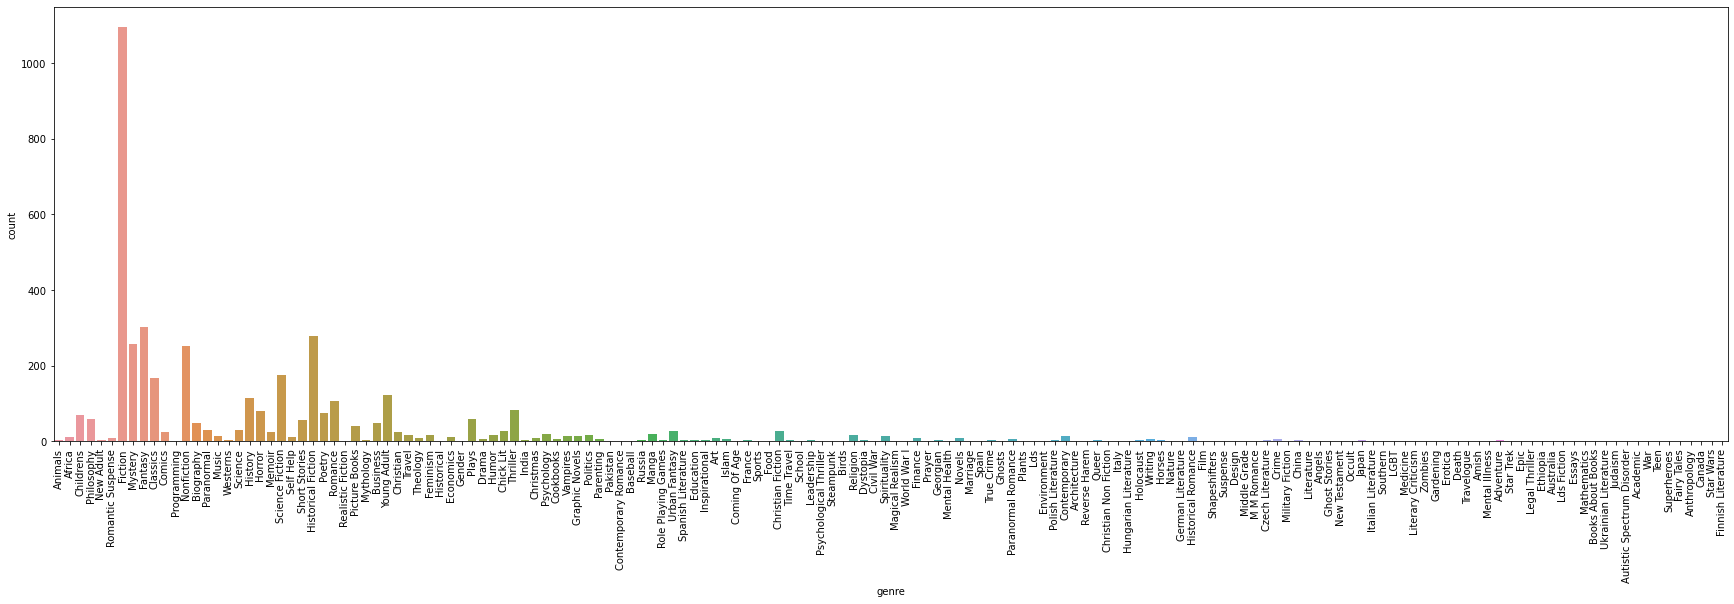

In [229]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)

sns.countplot(df1['genre'])

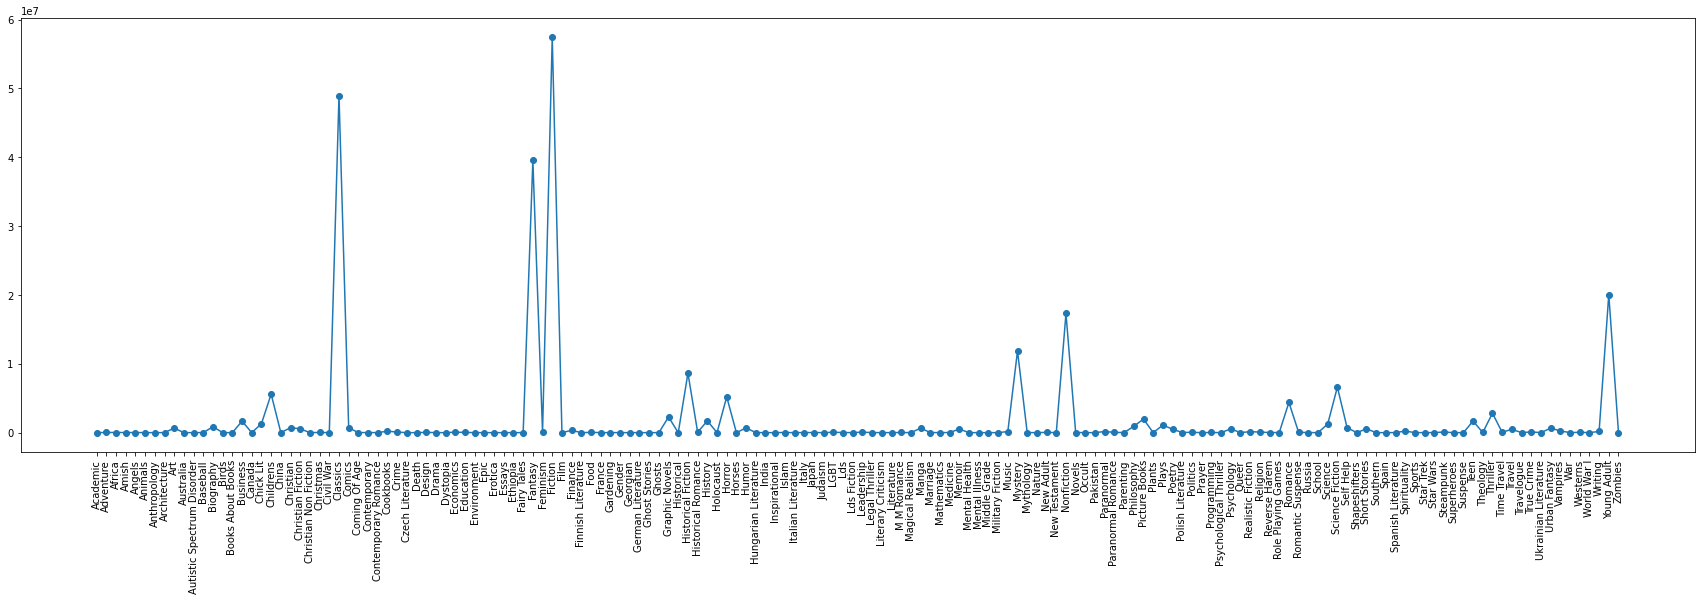

In [218]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)

plt.plot(df1.groupby('genre')['total ratings'].sum(),marker='o')

<AxesSubplot:xlabel='cluster', ylabel='count'>

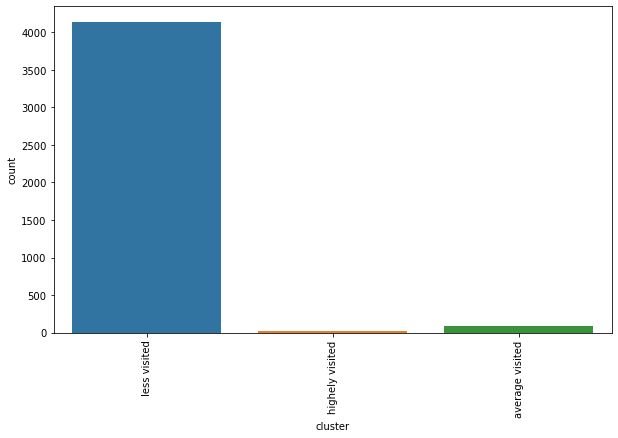

In [223]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)

sns.countplot(x=df1['cluster'])

<AxesSubplot:xlabel='rating', ylabel='total ratings'>

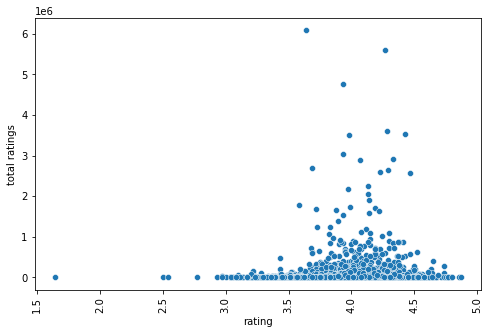

In [228]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)

sns.scatterplot(x=df1['rating'],y=df1['total ratings'])